In [12]:
import pymolpro
import pandas as pd


In [13]:
backend = 'local' 
project_name = 'HEAVY28_methodtest'
parallel = 8

In [14]:
methods = {"HF": "HF;counterpoise",
"MP2": "hf;MP2;counterpoise",
"MP3": "hf;MP3;counterpoise",
"MP4": "hf;MP4;counterpoise",
"PAPT2":"hf;PAPT;MP2;counterpoise",
"PAPT3":"hf;PAPT;MP3;counterpoise",
"PAPT4":"hf;PAPT;MP4;counterpoise",
"CCSD":"hf;CCSD;counterpoise",
"CCSD(T)":"hf;CCSD(T);counterpoise" }
bases = ['aug-cc-pVTZ-pp','aug-cc-pVDZ-pp']

In [15]:
db = pymolpro.database.load("GMTKN55_HEAVY28")
small=db.subset(open_shell=False,max_electrons=70)
print(small)

GMTKN55 HEAVY28 (closed shell only) (maximum number of electrons 70):

Molecules:
h2o: {'geometry': '           3\n  \n    O          0.00000000      0.00000000      0.39219533\n    H         -0.75610000      0.00000000     -0.19609767\n    H          0.75610000      0.00000000     -0.19609767\n', 'description': 'h2o'}
teh2_nh3: {'geometry': '           7\n  \n    TE        -0.27801386     -1.82151771      0.00000000\n    H          0.21816614     -3.38866571      0.00000000\n    H          1.27654414     -1.33346771      0.00000000\n    N         -0.27801386      1.35373929      0.00000000\n    H          0.15335914      1.77217829      0.81226000\n    H          0.15335914      1.77217829     -0.81226000\n    H         -1.24540086      1.64555529      0.00000000\n', 'description': 'teh2_nh3'}
sbh3: {'geometry': '           4\n  \n    SB         0.00000000      0.00000000      0.70962975\n    H         -0.69522101      1.20415811     -0.23654319\n    H         -0.69522101     -1.20415

In [16]:
results = {}
for method in methods:
    results[method] = {}
    for basis in bases:
        results[method][basis] = pymolpro.database.run(small, methods[method], basis, location=project_name,
                                                       backend=backend,
                                                       preamble="core,small", parallel=parallel)
        if results[method][basis].failed: print(method, basis, 'failed', results[method][basis].project_directory)
        
print(results)    

{'HF': {'aug-cc-pVTZ-pp': <pymolpro.database.Database object at 0x7f743074d810>, 'aug-cc-pVDZ-pp': <pymolpro.database.Database object at 0x7f74304d6020>}, 'MP2': {'aug-cc-pVTZ-pp': <pymolpro.database.Database object at 0x7f7430660850>, 'aug-cc-pVDZ-pp': <pymolpro.database.Database object at 0x7f74304d7af0>}, 'MP3': {'aug-cc-pVTZ-pp': <pymolpro.database.Database object at 0x7f74304d60e0>, 'aug-cc-pVDZ-pp': <pymolpro.database.Database object at 0x7f743066e440>}, 'MP4': {'aug-cc-pVTZ-pp': <pymolpro.database.Database object at 0x7f74304d6c50>, 'aug-cc-pVDZ-pp': <pymolpro.database.Database object at 0x7f74304d6680>}, 'PAPT2': {'aug-cc-pVTZ-pp': <pymolpro.database.Database object at 0x7f742fb7dd80>, 'aug-cc-pVDZ-pp': <pymolpro.database.Database object at 0x7f742fb7df00>}, 'PAPT3': {'aug-cc-pVTZ-pp': <pymolpro.database.Database object at 0x7f74ddbbb640>, 'aug-cc-pVDZ-pp': <pymolpro.database.Database object at 0x7f74305b2f20>}, 'PAPT4': {'aug-cc-pVTZ-pp': <pymolpro.database.Database object at 

In [17]:
extrapolate={}
for method in  methods:
    print(method)
    print(results[method])
    extrapolate[method]=pymolpro.database.basis_extrapolate(list(results[method].values()), list(results["HF"].values()),x=[2,3])
print(extrapolate)


HF
{'aug-cc-pVTZ-pp': <pymolpro.database.Database object at 0x7f743074d810>, 'aug-cc-pVDZ-pp': <pymolpro.database.Database object at 0x7f74304d6020>}
MP2
{'aug-cc-pVTZ-pp': <pymolpro.database.Database object at 0x7f7430660850>, 'aug-cc-pVDZ-pp': <pymolpro.database.Database object at 0x7f74304d7af0>}
MP3
{'aug-cc-pVTZ-pp': <pymolpro.database.Database object at 0x7f74304d60e0>, 'aug-cc-pVDZ-pp': <pymolpro.database.Database object at 0x7f743066e440>}
MP4
{'aug-cc-pVTZ-pp': <pymolpro.database.Database object at 0x7f74304d6c50>, 'aug-cc-pVDZ-pp': <pymolpro.database.Database object at 0x7f74304d6680>}
PAPT2
{'aug-cc-pVTZ-pp': <pymolpro.database.Database object at 0x7f742fb7dd80>, 'aug-cc-pVDZ-pp': <pymolpro.database.Database object at 0x7f742fb7df00>}
PAPT3
{'aug-cc-pVTZ-pp': <pymolpro.database.Database object at 0x7f74ddbbb640>, 'aug-cc-pVDZ-pp': <pymolpro.database.Database object at 0x7f74305b2f20>}
PAPT4
{'aug-cc-pVTZ-pp': <pymolpro.database.Database object at 0x7f74dd70c370>, 'aug-cc-pVD

In [24]:
results_with_extrapolation = results
for method in results_with_extrapolation.keys():
    results_with_extrapolation[method]['aug-cc-pV[23]Z'] = extrapolate[method]
results_with_extrapolation
results = results_with_extrapolation

pd.options.display.float_format = '{:,.2f}'.format
analyse=pymolpro.database.analyse([result['aug-cc-pV[23]Z'] for result in results.values()],results['CCSD(T)']['aug-cc-pV[23]Z'],unit='kJ/mol')
analyse['reaction statistics']

AttributeError: 'list' object has no attribute 'reaction_energies'

In [19]:
results

{'HF': {'aug-cc-pVTZ-pp': <pymolpro.database.Database at 0x7f743074d810>,
  'aug-cc-pVDZ-pp': <pymolpro.database.Database at 0x7f74304d6020>,
  'aug-cc-pV[23]Z': [<pymolpro.database.Database at 0x7f7430658370>]},
 'MP2': {'aug-cc-pVTZ-pp': <pymolpro.database.Database at 0x7f7430660850>,
  'aug-cc-pVDZ-pp': <pymolpro.database.Database at 0x7f74304d7af0>,
  'aug-cc-pV[23]Z': [<pymolpro.database.Database at 0x7f7430658160>]},
 'MP3': {'aug-cc-pVTZ-pp': <pymolpro.database.Database at 0x7f74304d60e0>,
  'aug-cc-pVDZ-pp': <pymolpro.database.Database at 0x7f743066e440>,
  'aug-cc-pV[23]Z': [<pymolpro.database.Database at 0x7f74304d64a0>]},
 'MP4': {'aug-cc-pVTZ-pp': <pymolpro.database.Database at 0x7f74304d6c50>,
  'aug-cc-pVDZ-pp': <pymolpro.database.Database at 0x7f74304d6680>,
  'aug-cc-pV[23]Z': [<pymolpro.database.Database at 0x7f74304d7c70>]},
 'PAPT2': {'aug-cc-pVTZ-pp': <pymolpro.database.Database at 0x7f742fb7dd80>,
  'aug-cc-pVDZ-pp': <pymolpro.database.Database at 0x7f742fb7df00>,


KeyError: 'aug-cc-pV[23]Z-pp'

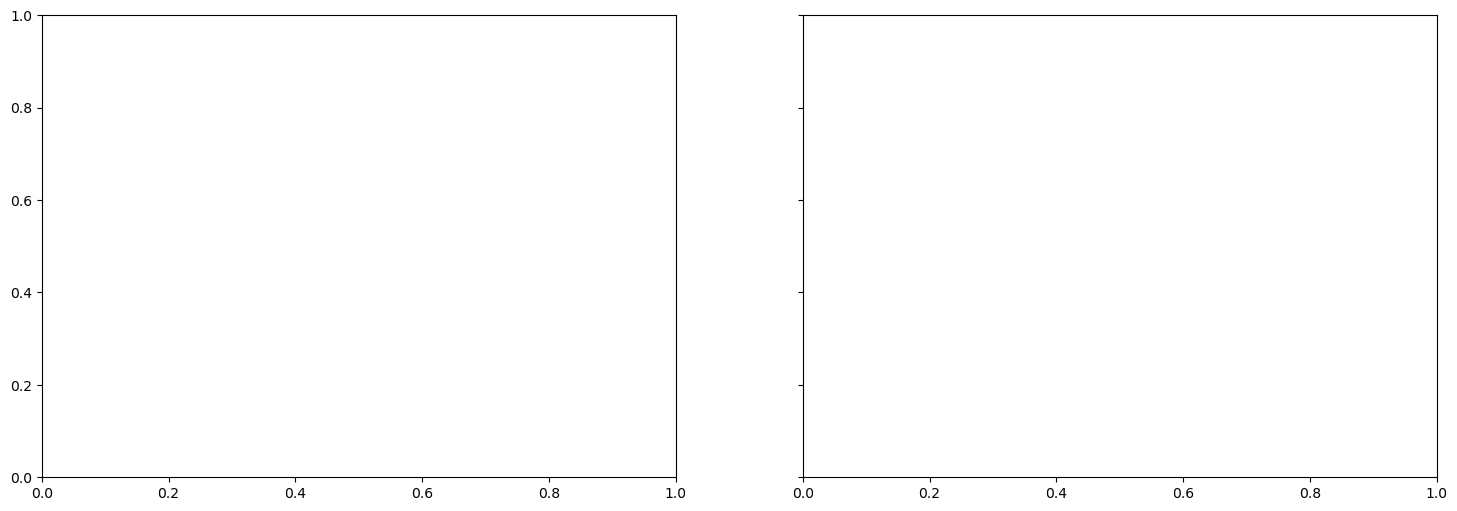

In [20]:
import matplotlib.pyplot as plt
import pandas 

methods_pruned = [method for method in methods if (method != 'HF') and (method != 'CCSD(T)')]
bases_pruned = ['aug-cc-pV[23]Z-pp','aug-cc-pVTZ-pp']
fig, panes = plt.subplots(nrows=1, ncols=len(bases_pruned), sharey=True, figsize=(18, 6))

for pane in range(len(bases_pruned)):
    data = []
    for method in methods_pruned:
        data.append(
            pymolpro.database.analyse(results[method][bases_pruned[pane]],
                                      results['CCSD(T)']['aug-cc-pVDZ-pp'],'kJ/mol')['reaction energy deviations'].to_numpy()[:, 0]
        )
    panes[pane].violinplot(data, showmeans=True, showextrema=True, vert=True, bw_method='silverman')
    panes[pane].set_xticks(range(1, len(methods_pruned) + 1), labels=methods_pruned, rotation=-90)
    panes[pane].set_title(bases_pruned[pane])
panes[0].set_ylabel('Error / kJ/mol')
plt.savefig(project_name + ".violin.pdf")
